# Training Linear Models to Forecast Level of Diabetes in Patients in One Year

## Summary

This project aims to predict the level of disease progression in one year of patients with diabetes. The data comes from a toy [scikit-learn dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes). The value that I am trying to predict is a quantitative measure of disease progression, and therefore this becomes a regression problem and not a classification problem. This is one of the first projects I pursued completely independent of schooling or work, with the intention of bettering my knowledge of linear models. With that being said, this code *only* trains basic linear models. Further work for this project entails training a wider variety of models.

```python
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(return_X_y=True,as_frame=True,scaled=False)
```

## Data

Before talking about input variables and output variables, I want to add a quick note on how the data was split. This data is assumed to not be time dependent (at least not time dependent enough to impact this analysis). This project uses the train_test_split, and establishes a predetermined random state, so that anyone running this code gets the same split. This split essentially makes a random k-fold. To elaborate, a random 15% of the patients will be sent to the holdout, or test, dataframe, and the remaining 85% will stay in the training dataframe. In the future, the cross validations are treated the same way.

### Input Variables

There are 10 input variables (x variables) for this project:
- age (age in years)
- sex
- bmi (body mass index)
- bp (average blood pressure)
- s1 (tc, total serum cholesterol)
- s2 (ldl, low-density lipoproteins)
- s3 (hdl, high-density lipoproteins)
- s4 (tch, total cholesterol / HDL)
- s5 (ltg, possibly log of serum triglycerides level)
- s6 (glu, blood sugar level)

The original sklearn dataset defaults to scaling the values; however in the above code, if `scaled` is set to `False`, then it will return the original values, which gives us the freedom to scale the variables as we want to.

### Target Variable

As mentioned, there is only one target variable (y variable)
- a quantitative measure of disease progression one year after baseline.

### Exploratory Data Analysis

Before creating any models, I perform an indepth analysis on all of the variables. Below is a display of all of the variables which are indisputably **continuous**. 

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>],
       [<Axes: title={'center': 's2'}>, <Axes: title={'center': 's3'}>,
        <Axes: title={'center': 's5'}>, <Axes: title={'center': 's6'}>]],
      dtype=object)

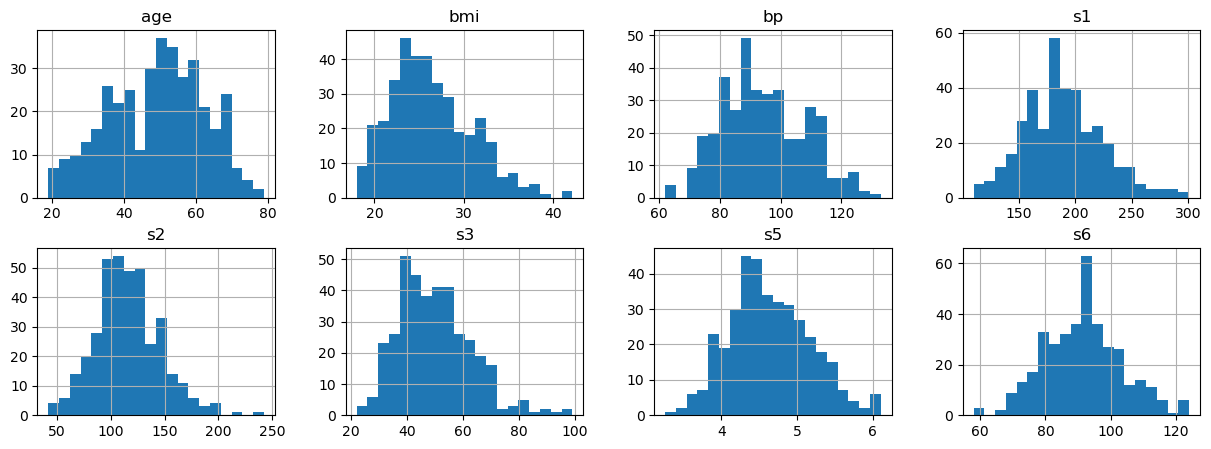

In [10]:
import pandas as pd
X_train = pd.read_csv('Input/training_data.csv').drop(columns=['target','patient'])
X_train[['age','bmi','bp','s1','s2','s3','s5','s6']].hist(bins=20, figsize=(15, 5),layout=(2,4))

There is not much to take away from looking at this data, but there are a few takeaways. bmi looks like it could benefit from being logged, and in fact when the log is taken, it appears to be reflect a more normal distribution (this will come up again later). The description of the dataset indicates that s5 is 'possibly the log of serum triglycerides level,' but in my opnion, the data looks fine the way it is; therefore, I did not change anything. Additionally, s6 appears to have a noticable mode.

Below is a display of all of the variables which I believe to be **discrete**. 

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 's4'}>,
        <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

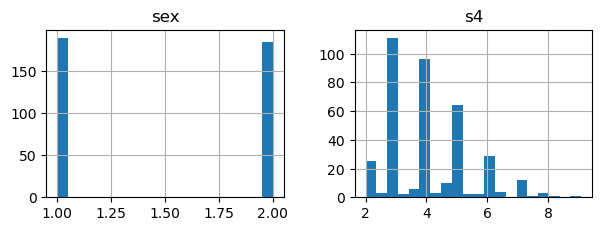

In [15]:
X_train[['sex','s4']].hist(bins=20, figsize=(15, 5),layout=(2,4))

Sex is obviously discrete, but the more controversal variable is s4. Taken by its defininition, s4 is not discrete as it appears it *can* take on any value between roughly 2 and 12. **However**, most of the data falls under 6 numbers: 2, 3, 4, 5, 6, 7. It begs the question whether or not this data should be treated as categorical or continuous. For the purpose of this analysis, both will be considered

This dataset also does not have any missing values, incredibly misrepresentative of the real world. Nonetheless, this makes the model creation slightly easier, as now we do not have to consider how to impute missing values. Additionally, an analysis of the target variables reveals nothing too exciting - relatively normal right-skewed distribution.

Finally, I make some graphs in Power BI to visualize the data further. I graphed every input variable against the target, to see visually if any looked like they had a stronger correlation. Upon analyzing, bmi looked like it had the strongest linear relationship compared to the target, and this makes intuitive sense. People with a higher bmi run a higher risk of having diabetes. Below is two visualizations made in Power BI, to demonstrate this small, but noticable relationship.

<div style="display: flex; justify-content: space-between;">
    <div style="flex: 1; padding: 10px;">
        <img src="Input/targetvbmi_s4.png" style="width: 100%;">
    </div>
    <div style="flex: 1; padding: 10px;">
        <img src="Input/targetvbmi_sex.png" style="width: 100%;">
    </div>
</div>

## Models

The first model I used is ordinary least squares (OLS). This is definitely the most basic model, likely something even covered in a high school algebra class (at least in a 2D form). This model minimizes the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation. It creates a 'line of best fit' that most closely resembles the data. In a 2D space, with one input variable and one target variable, this can be visualized very easily. For instance, looking at the two graphs above, one can easily imagine the line of best fit being a diagonal line from bottom left to top right. Now, for example, let's say that the input variable s1 was added to this graph. To visualize, this 'graph' now becomes a cube, with s1 lying along the z-axis. Now, the line of best fit has some dimension going 'into the screen.' This same trend continues as you add more variables, except now it becomes increasingly harder to visualize; nonetheless, the fundamental principles are still the same.

I set up a preprocessing pipeline to scale all numerical variables and encode categorical values. For the time being, I am only considering sex to be categorical, and I am leaving s4 as continuous. Here, I could've added an additional step to treat outliers, but I opted against this, with the feeling that this wasn't too necessary. A repeat of this project might include this step. As this is just an OLS model, there are no real hyperparameters to tune. As a result, this preprocessing pipeline can be placed directly into a linear regression, without the need for a gridsearch. This model, along with all future models, use cross validation with 5 folds and score using r^2. As this is a regression problem, r^2 is a very typical scoring method. Upon running this linear regression, **ordinary least squares yields an r^2 of 0.52155**. The three strongest coefficients are s5 (35.188579), s1 (-28.612766), and bmi (26.435204). Below is a graph, where the x variable is this new 'variable' the OLS model generated to best fit the y data.

<img src="Input/olsreg.png">

I try to alter the OLS model in two ways. First of all, I try to repeat the exact same model, except with the log of bmi instead of bmi. As mentioned earlier, the log appears to have a more Gaussian distribution, and therefore more suitable to use. However, **this adjusted model using the log of bmi yielded an r^2 of 0.51566**, slightly worse than before. After this, I try to make s4 categorical. To do this, I add 6 columns that are binary representing if s4 is either 2,3,4,5,6, or 7, respectively. Yet, **this adjusted model treating s4 as categorical yielded an r^2 of 0.52113**, virtually the same as the original model.

I then train a Lasso model. In principle, Lasso does a lot of what OLS already does, except Lasso has an extra feature in the mathematical equation that will allow coefficeints to be set to 0. With this, comes an added parameter, an alpha value. When alpha is small, it moreso reflects OLS - almost, if not all of the variables are still non-zero. As alpha is increased, this results in greater shrinkage of the coefficients, and therefore more input variables being set to 0. This is a common model used when there are a lot of input variables and it is import to filter out the 'noise.' Compared with the OLS model, the first Lasso model uses the same preprocessing pipeline, scoring metric, and number of cv folds. The only difference is now there is a hyperparameter to tune - alpha. Running this model, the optimal alpha is 0.44984. This **Lasso model yields an r^2 of 0.52221**, still in the same realm as OLS. To try and escape the lower 0.5's, I attempted to add more features. I did this using PolynomialFeatures with a degree of 2, with the thinking that even if I am adding more variables, Lasso will help to cancel out the noise created by it. However, **this adjusted model with polynomial features yielded an r^2 of 0.50999**.

After running these 5 models, I ran a Ridge model and an Elastic Net model, yet both gave near identical r^2 values. In confusion as to where else to edit prior models, and in eagerness to move onto my next projects, I opted to use the best of these 5 and predict the future variables.

## Prediction

The best of these models, albeit slightly, is the first Lasso model, with an r^2 of 0.52221. So, with this model, I brought in the holdout data, fit the whole training data on my lasso model, and predicted on the x variables in the holdout data. When comparing my predicted y variables with the actual y variables (y_pred vs y_test), it **yielded an r^2 value of 0.22727**..... What happened..... The graph looks like this:

<img src='Input/prediction.png'>

where the x axis is y_pred and the y axis is y_test. To be honest, I am still confused why this r^2 is significantly lower than it was in the training dataset. The obvious answer is overfitting, but from my perspective, the cross validation folds, and the fact that 5 different models yielded virtually identical r^2 rules out this possibility. Calculating the percent error between y_pred and y_test looks a little bit better:

<img src='Input/percenterror.png'>

A majority of the percent errors lie between 0 and 20%, and only 4 instances have a percent error greater than 100%. Regardless, these results are relatively poor. It asks the following questions:
- Are these results contributed to mistakes in preprocessing or model creation?
- Are these results poor because only basic linear models were used?
- Are these results genuinely refelective of the difficult nature of predicting diabetes in patients?
- Are these results poor because of the fact this was a toy dataset and not a real one?

## Conclusion

In conclusion, the best model in training yielded an r^2 of 0.52221, and when introduced to the testing set, it yielded an r^2 of 0.22727. This project covered two linear regression models (OLS and Lasso), preprocessing data, and exploratory data analysis. While the r^2 value was not as high as I would've liked, I got what I wanted to out of this project, which was a deeper understanding of linear regression models. In the future, I will likely return to this dataset to see if I can beat this r^2 value, likely when I have a better understanding of tree-based models. I am completely open to receiving tips and/or feedback on how I can improve this miniproject.